<a href="https://colab.research.google.com/github/PiyushiAnand/FinSearch_RL/blob/main/rl_in_trading_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

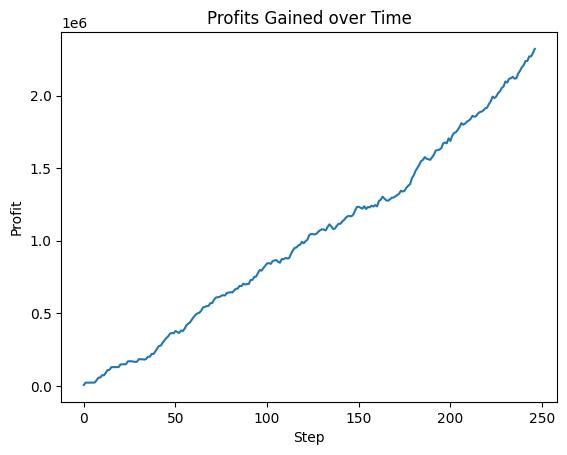

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load the training data into a Pandas DataFrame.
train_data = pd.read_excel("/HistoricalPrices-3.xlsx")

# Load the testing data into a Pandas DataFrame.
test_data = pd.read_excel("/nifty50.xlsx")

# Create a Q-table, which is a table that stores the Q-values for each state-action pair.
num_train_states = train_data.shape[0]
num_test_states = test_data.shape[0]
num_actions = 2
q_table = torch.zeros((num_train_states, num_actions))

# Initialize the Q-table with random values.
q_table = nn.init.xavier_uniform_(q_table)

# Define the epsilon-greedy policy, which is a policy that selects an action with a probability of epsilon and the greedy action with a probability of 1-epsilon.
def epsilon_greedy_policy(state, q_table, epsilon):
    if random.random() < epsilon:
        action = random.randint(0, num_actions - 1)
    else:
        action = torch.argmax(q_table[state])
    return action

# Define the Bellman equation, which updates the Q-values for each state-action pair.
def bellman_equation(state, action, reward, next_state_index, q_table):
    if next_state_index < num_train_states:
        next_state = torch.tensor([next_state_index])
        target = reward + gamma * torch.max(q_table[next_state])
    else:
        target = reward
    q_table[state, action] = target

# Training phase
num_epochs = 100
epsilon = 0.05
gamma = 0.99
for i in range(num_epochs):
    for state in range(num_train_states):
        action = epsilon_greedy_policy(state, q_table, epsilon)
        reward = train_data.iloc[state, 4]
        next_state_index = state + 1
        bellman_equation(state, action, reward, next_state_index, q_table)


# Testing phase
shares = 0
portfolio = 10000
profits = []
for state in range(num_test_states):
    action = torch.argmax(q_table[state])
    if action == 1:
        shares += 1
    profit = test_data.iloc[state, 4] * shares - portfolio
    profits.append(profit)

# Visualize the results by showing the profits gained over time.

plt.plot(profits)
plt.xlabel('Step')
plt.ylabel('Profit')
plt.title('Profits Gained over Time')
plt.show()
